### MATH 421 - Statistical Analysis with R
#### Final Project
#### Connor Hayes

# Overview: 
##### The dataset comprised of housing data related to home sales in Ames, Iowa from 2006 - 2010.  I found the data on kaggle, at the link below, and it look to me a commonly used data set for statistical analysis.  The aim of the dataset is to better predict the sells price of a house.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [131]:
house = read.csv('housedata.csv', header = TRUE)
library(caret)
library(ggplot2)
library(RANN)
library(ranger)
library(rpart)
library(e1071)

The target variable is the house sales price.  The sales price was originally a numeric variable, so to make it work with the models, we made it categorical by dividing the data. The data is split into house that were sold for above or below 140k.  I used $140K because thats what Zillow estimated the median home in Ames, Iowa cost in 2010. The model to be able to predict if a house was cheap or expensive compared to Zillows median price. The target variable is coded as 1 and 2. 1 is below average and 2 is above average.

This data set orginally had about 80 variables, but to simiplify the data I reduced it down to 18 variables that I felt were the most important. It has 5 numeric, 12 categorical, and the target variable.  The variable reprsent factors like year the house was sold, year it was remodelled, number of rooms, garage size, lot area, neighborhood, overall quailty, etc. Each of the varaibles is unique enough that they should be strong predictors of house sales price.

In [132]:
names(house)[1] = "target"
house$target[house$target <= 140000] <- 1
house$target[house$target>140000] <- 2
house$target = as.factor(house$target)
house$YrSold = as.factor(house$YrSold)
house$YearRemodAdd = as.factor(house$YearRemodAdd)
house$MoSold = as.factor(house$MoSold)
house$TotRmsAbvGrd = as.factor(house$TotRmsAbvGrd)
house$GarageCars = as.factor(house$GarageCars)
house$OverallQual = as.factor(house$OverallQual)
summary(house)

 target    MSSubClass     LotFrontage        LotArea         LotConfig   
 1:509   Min.   : 20.0   Min.   : 21.00   Min.   :  1300   Corner : 263  
 2:951   1st Qu.: 20.0   1st Qu.: 59.00   1st Qu.:  7554   CulDSac:  94  
         Median : 50.0   Median : 69.00   Median :  9478   FR2    :  47  
         Mean   : 56.9   Mean   : 70.05   Mean   : 10517   FR3    :   4  
         3rd Qu.: 70.0   3rd Qu.: 80.00   3rd Qu.: 11602   Inside :1052  
         Max.   :190.0   Max.   :313.00   Max.   :215245                 
                         NA's   :259                                     
  Neighborhood   BldgType      HouseStyle   OverallQual   YearRemodAdd
 NAmes  :225   1Fam  :1220   1Story :726   5      :397   1950   :178  
 CollgCr:150   2fmCon:  31   2Story :445   6      :374   2006   : 97  
 OldTown:113   Duplex:  52   1.5Fin :154   7      :319   2007   : 76  
 Edwards:100   Twnhs :  43   SLvl   : 65   8      :168   2005   : 73  
 Somerst: 86   TwnhsE: 114   SFoyer : 37   4      :11

This chart shows the break down of the target variable

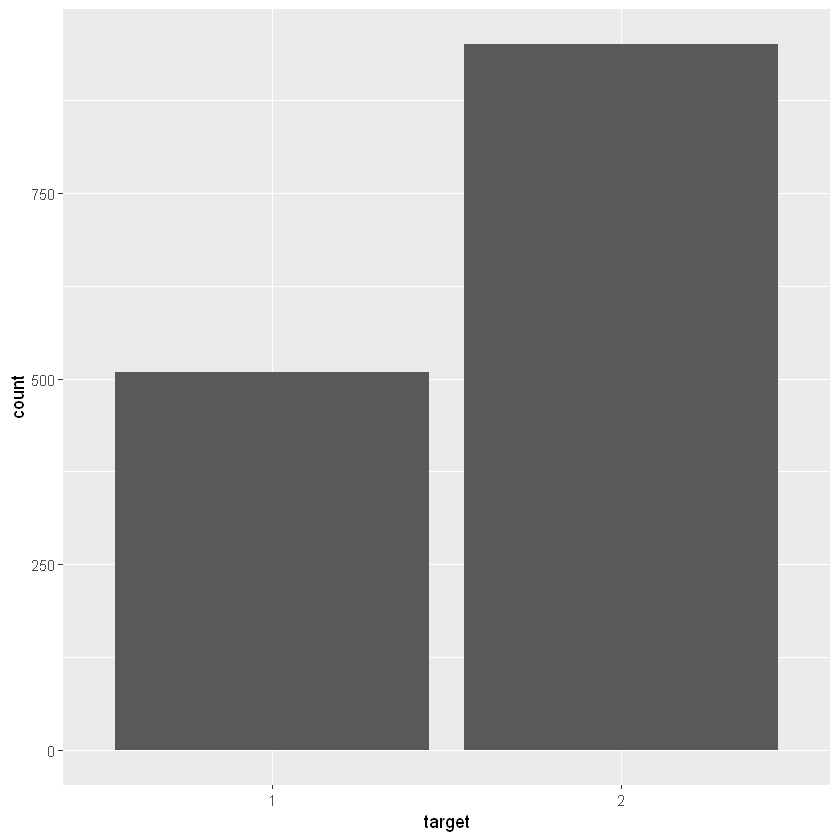

In [104]:
ggplot(data=house)+geom_bar(mapping = aes(x=house$target))+labs(x='target')

The chart shows the break down of housing quality by target variable.  There is a noticable difference between quality rating for the two target variables.

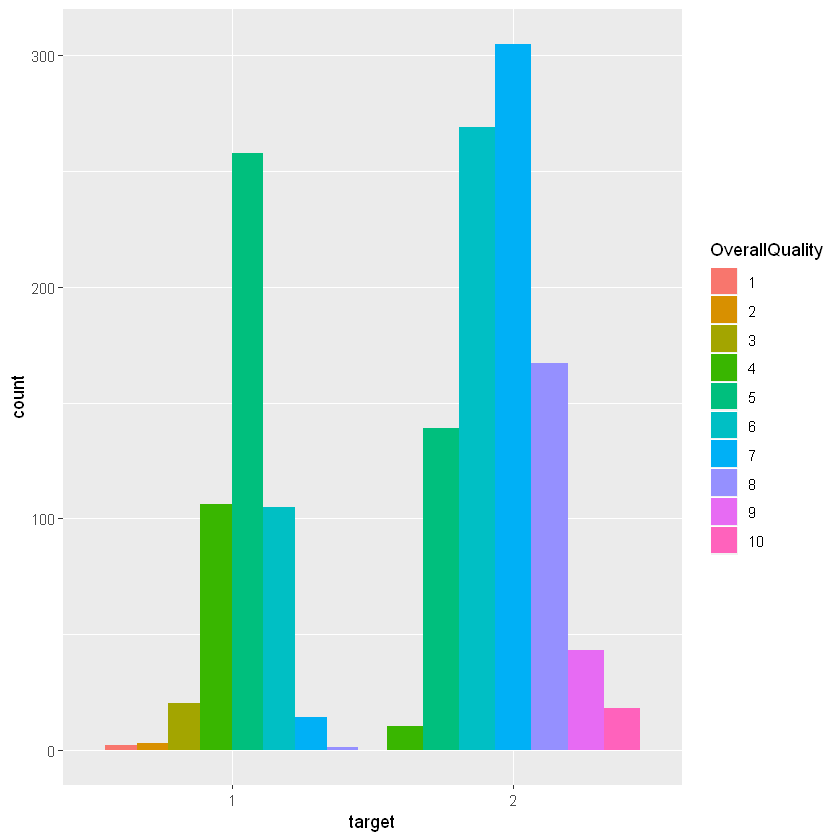

In [105]:
ggplot(data=house)+ geom_bar(mapping = aes(x=house$target, fill=house$OverallQual), position = "dodge") + labs(x='target', fill = 'OverallQuality')

Compares the style of the house, mostly the number of floors, to the target variable.  There is again a noticable difference between the types of houses for represented by the target variables.

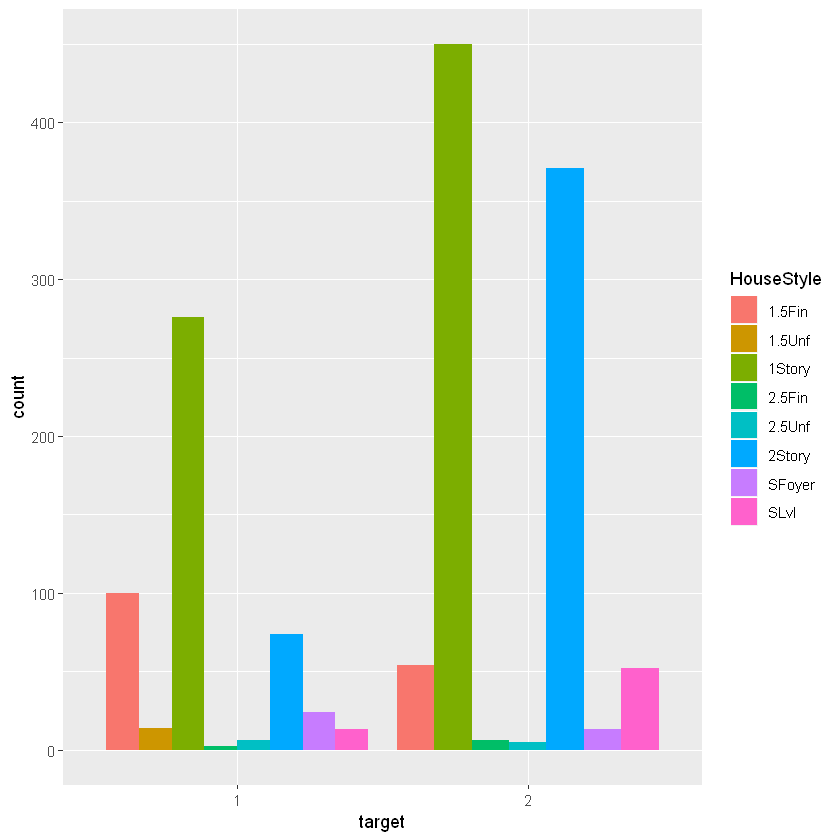

In [106]:
ggplot(data=house)+ geom_bar(mapping = aes(x=house$target, fill=house$HouseStyle), position = "dodge") + labs(x='target', fill = 'HouseStyle')


This chart shows the number of houses sold in each neighborhood for each target variable. There are some major differences between the two target variables.

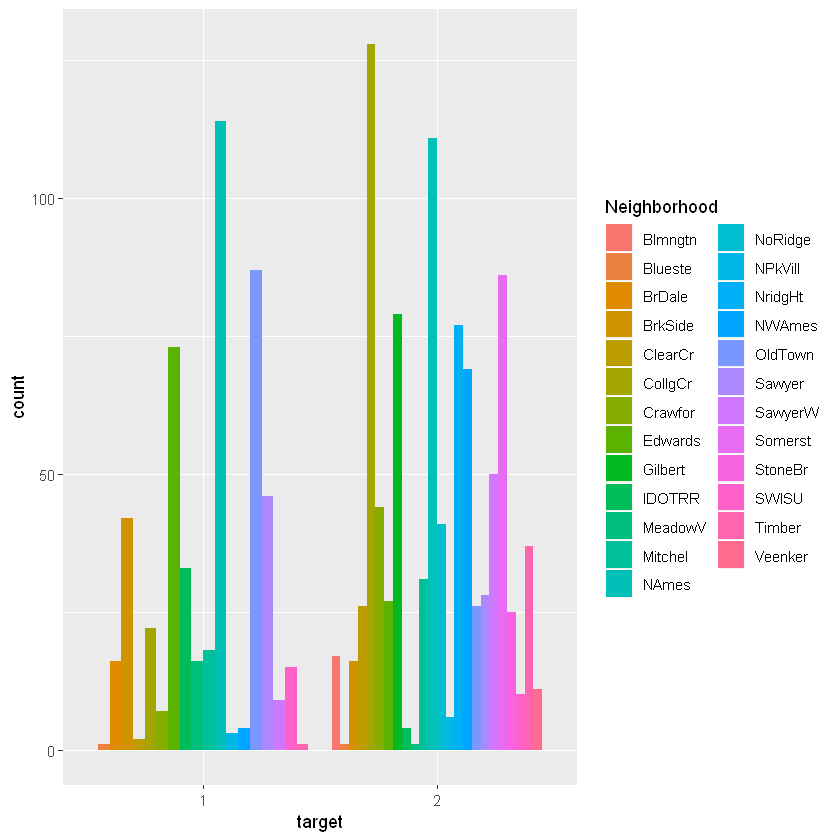

In [107]:
ggplot(data=house)+ geom_bar(mapping = aes(x=house$target, fill=house$Neighborhood), position = "dodge") + labs(x='target', fill = 'Neighborhood')


Shows the breakdown of type of building for each target variable.  Most of the houses were single famly homes.

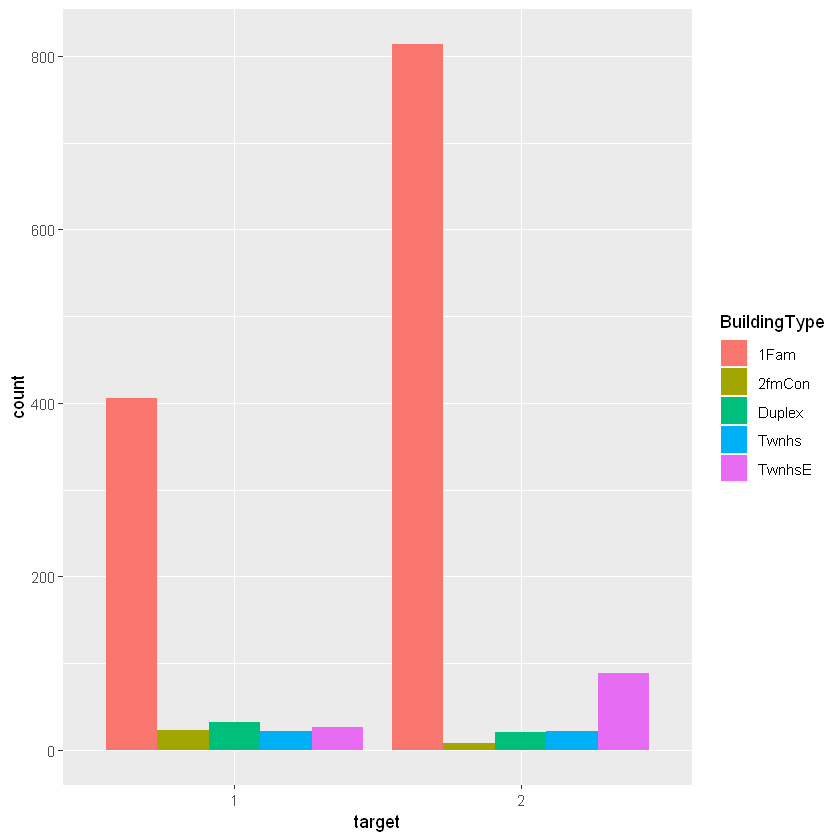

In [108]:
ggplot(data=house)+ geom_bar(mapping = aes(x=house$target, fill=house$BldgType), position = "dodge") + labs(x='target', fill = 'BuildingType')



The chart shows how many houses were sold in each month for the target variables.  The spring and summer months were the most common.

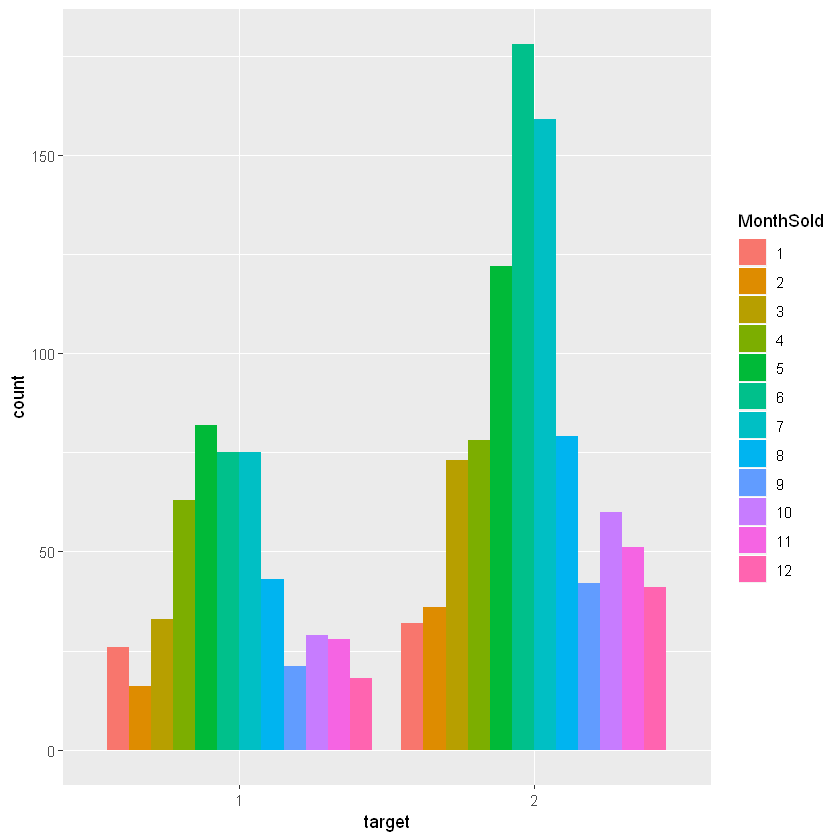

In [109]:
ggplot(data=house)+ geom_bar(mapping = aes(x=house$target, fill=house$MoSold), position = "dodge") + labs(x='target', fill = 'MonthSold')

This chart shows the number of rooms per house for each target variable.  There are noticable differences in the number of rooms between the two target variables. 

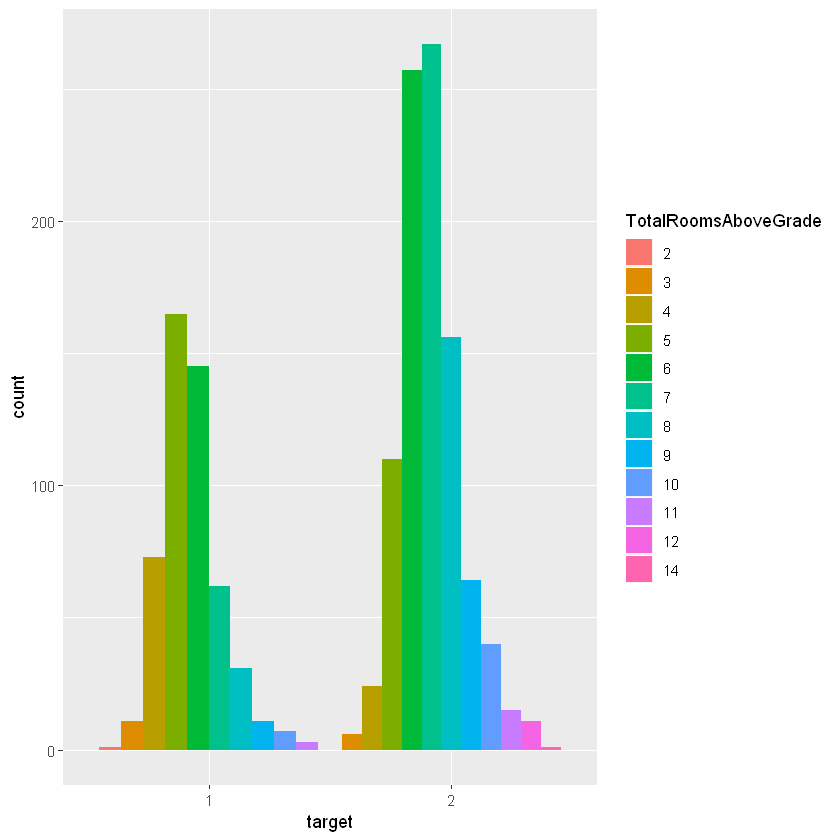

In [110]:
ggplot(data=house)+ geom_bar(mapping = aes(x=house$target, fill=house$TotRmsAbvGrd), position = "dodge") + labs(x='target', fill = 'TotalRoomsAboveGrade')

This chart shows the density of the number of houses sold for each target variable.

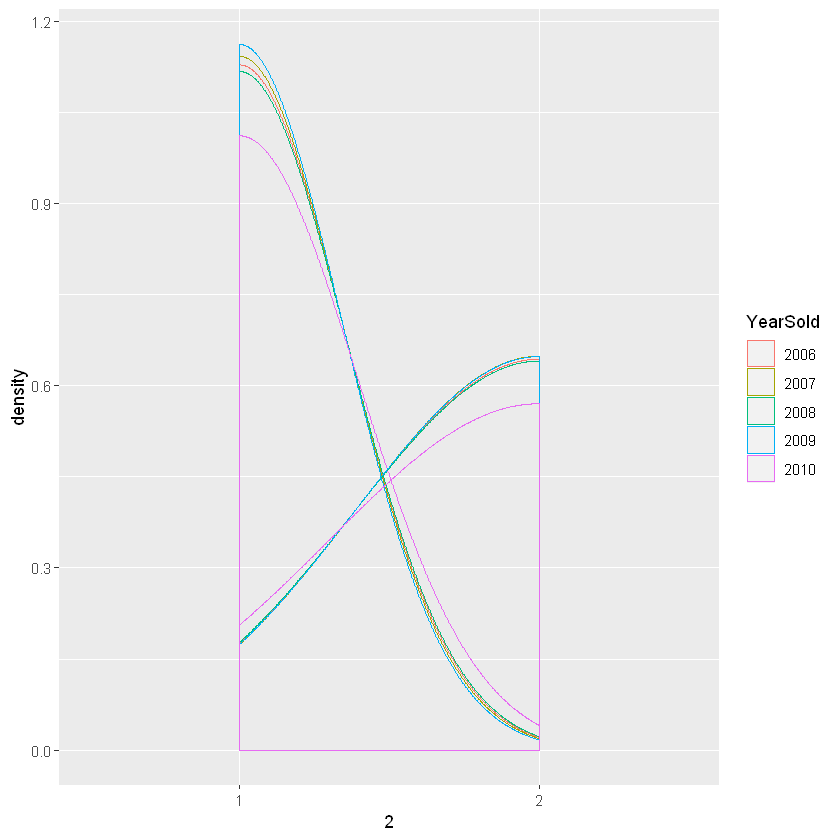

In [111]:
ggplot(data=house)+geom_density(mapping = aes(x=house$target,color=house$YrSold))+labs(x=house$target,color='YearSold')

This chart shows the number of car garage for each of the target variables.  The more expensive house tend to have larger car garages.

Warning message:
"Groups with fewer than two data points have been dropped."

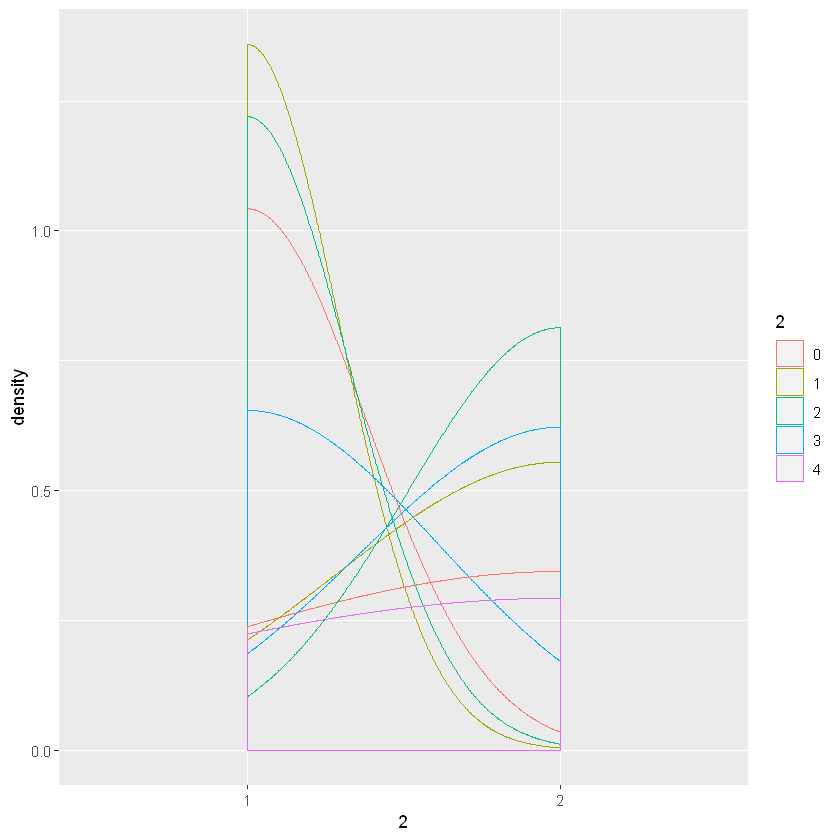

In [112]:
ggplot(data=house)+geom_density(mapping = aes(x=house$target,color=house$GarageCars))+labs(x=house$target,color=house$GarageCars)

This chart shows the density of building type for each target variable.  Most of the home sales were of single family homes.

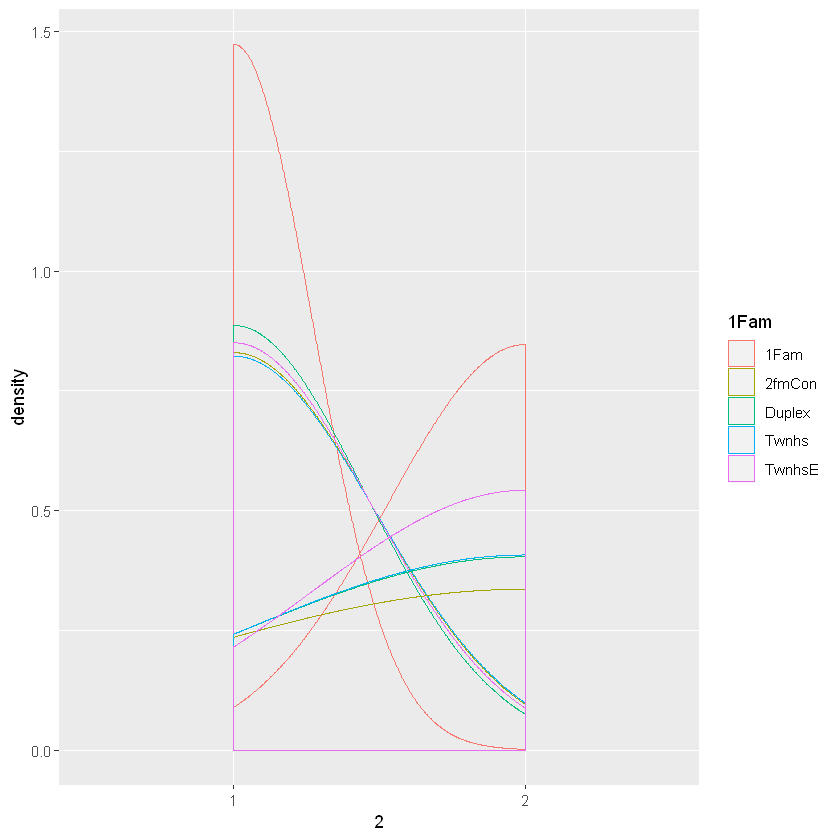

In [113]:
ggplot(data=house)+geom_density(mapping = aes(x=house$target,color=house$BldgType))+labs(x=house$target,color=house$BldgType)

This plot compares lot frontage to lot area with different colors each target variable.  The more expensive homes had more variablilty in area and frontage.

Warning message:
"Removed 259 rows containing missing values (geom_point)."

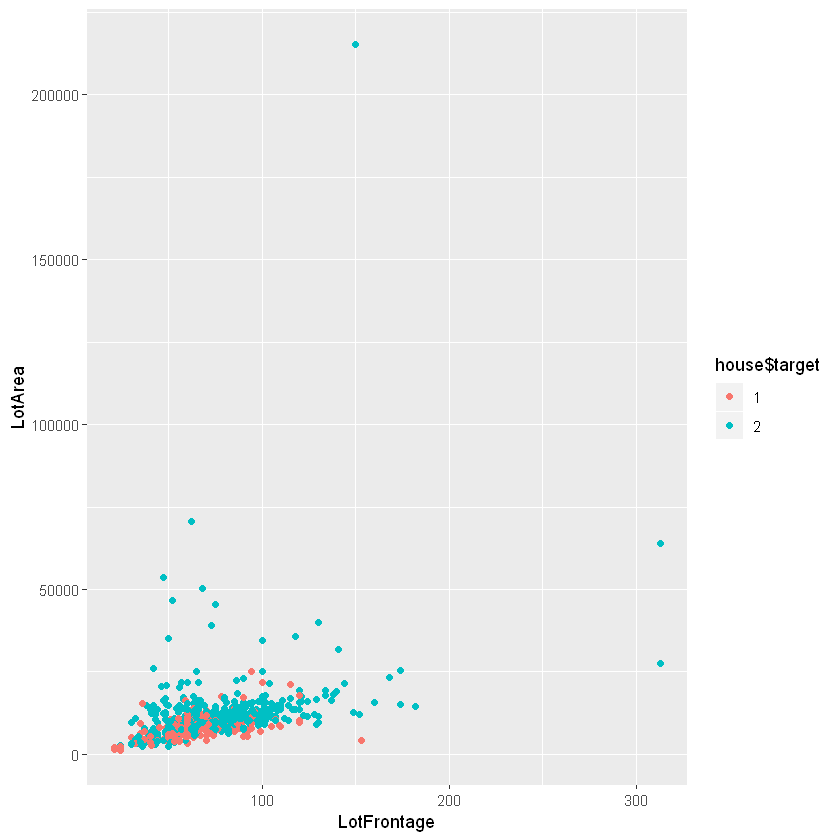

In [114]:
ggplot(data=house)+geom_point(mapping=aes(x=house$LotFrontage, y=house$LotArea, color = house$target))+labs(x='LotFrontage',y='LotArea')

The plot compares masonary area to lot area with different colors for each target variable.  The more expensive houses were again much more spread out compared to the cheaper houses.

Warning message:
"Removed 8 rows containing missing values (geom_point)."

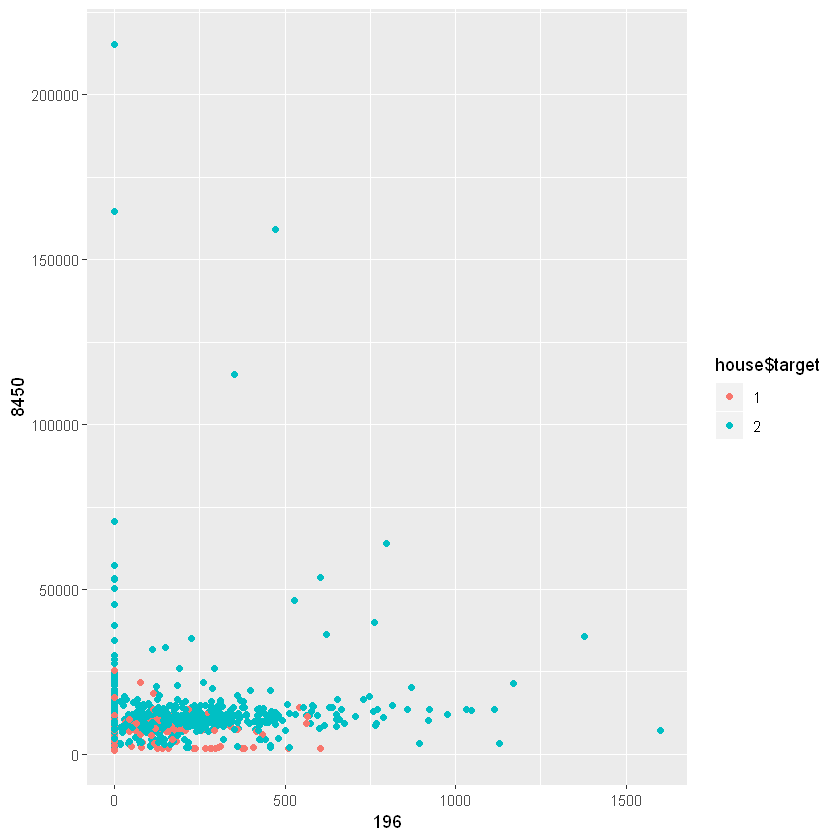

In [115]:
ggplot(data=house)+geom_point(mapping=aes(x=house$MasVnrArea, y=house$LotArea, color = house$target))+labs(x=house$MasVnrArea,y=house$LotArea)

This plot compare the basement finished area with the colors representing the different target variables.  Most of the data is bunched together expect for a handful of outliers.

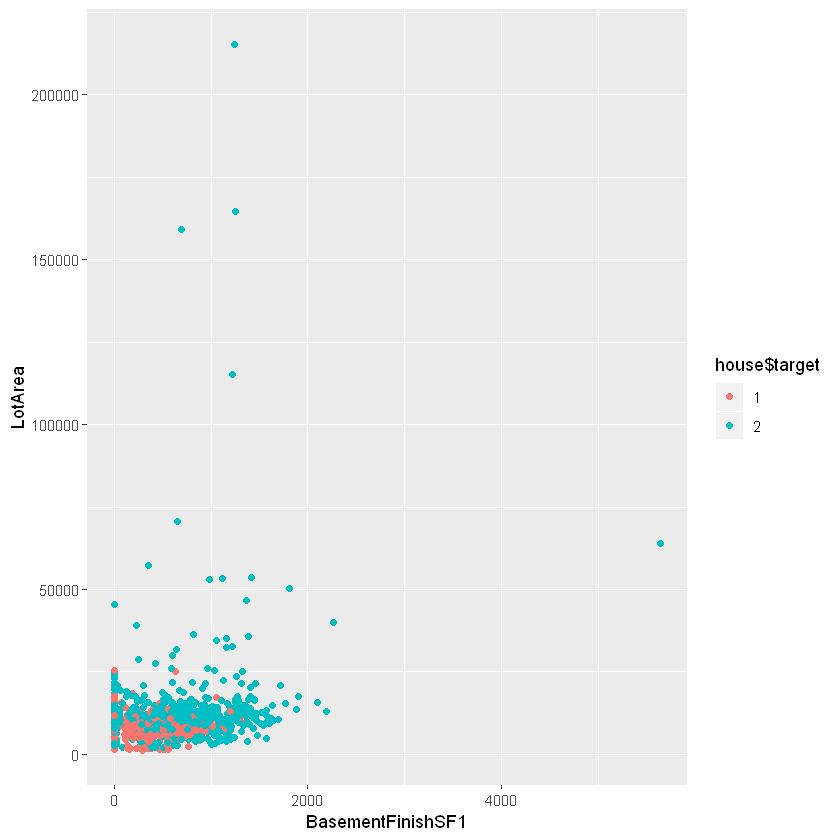

In [116]:
ggplot(data=house)+geom_point(mapping=aes(x=house$BsmtFinSF1, y=house$LotArea, color = house$target))+labs(x='BasementFinishSF1',y='LotArea')

This plot compares finished basement area to masonary area with the target variable represented by the colors.  Most of the houses have within the same range of masonary area except a few outliers.

Warning message:
"Removed 8 rows containing missing values (geom_point)."

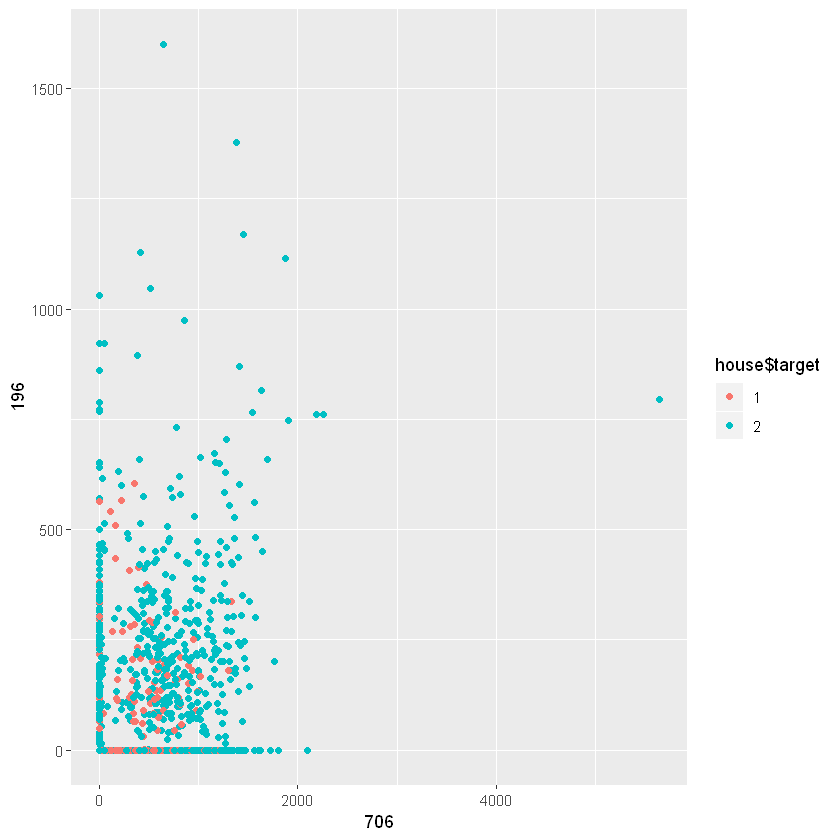

In [117]:
ggplot(data=house)+geom_point(mapping=aes(x=house$BsmtFinSF1, y=house$MasVnrArea, color = house$target))+labs(x=house$BsmtFinSF1,y=house$MasVnrArea)

This plot compares finished basement area to lot frontage with the target variable represented by the colors.  Most of the houses have within the same range of finished basement area except a few outliers.

Warning message:
"Removed 259 rows containing missing values (geom_point)."

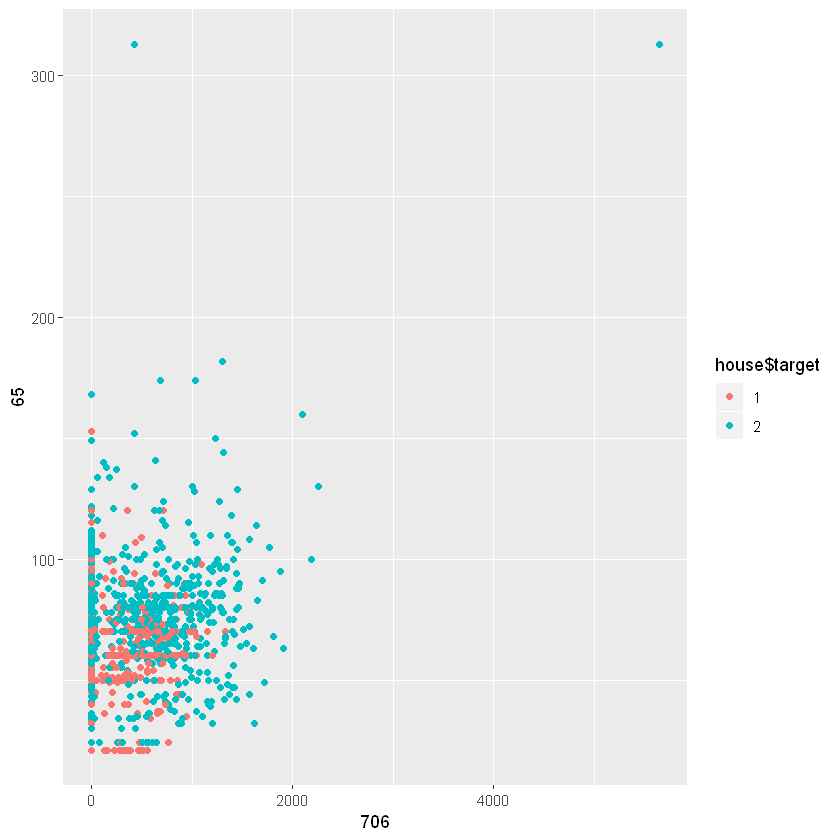

In [118]:
ggplot(data=house)+geom_point(mapping=aes(x=house$BsmtFinSF1, y=house$LotFrontage, color = house$target))+labs(x=house$BsmtFinSF1,y=house$LotFrontage)

### Handling Missing Data
The first way I handled the missing data was to eliminate the observations that had any missing data.  There is not that much missing data with only a few variable missing data, so eliminating some data should not have a big impact on the model overall.
The second method I just was the KnnImpute. Third was the Median Impute method.

In [133]:
house1 = house1[complete.cases(house1), ]
sum(is.na(house1))

preProcess_knn <- preProcess(house, method='knnImpute')
knnhouse <- predict(preProcess_knn, newdata = house)
sum(is.na(knnhouse))

preProcess_med<- preProcess(house,method ='medianImpute')
medhouse <- predict(preProcess_med, newdata = house)
sum(is.na(medhouse))

[1] 0

[1] 0

[1] 0

#### Baseline Models.  
These models run basic ranger, random forest models for each of the 3 immpuation methods.  This will set a base for which model is likely to be the best predictor.

In [120]:
set.seed(10)
model1a <- train(target~.,data = house1, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE))
model1b <- train(target~.,data = knnhouse, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE))
model1c <- train(target~.,data = medhouse, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE))
print(model1a)
print(model1b)
print(model1c)

+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=36, min.node.size=1, splitrule=gini 
- Fold1: mtry=36, min.node.size=1, splitrule=gini 
+ Fold1: mtry=70, min.node.size=1, splitrule=gini 
- Fold1: mtry=70, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=36, min.node.size=1, splitrule=gini 
- Fold2: mtry=36, min.node.size=1, splitrule=gini 
+ Fold2: mtry=70, min.node.size=1, splitrule=gini 
- Fold2: mtry=70, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=e

+ Fold1: mtry=  2, min.node.size=1, splitrule=gini 
- Fold1: mtry=  2, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 80, min.node.size=1, splitrule=gini 
- Fold1: mtry= 80, min.node.size=1, splitrule=gini 
+ Fold1: mtry=159, min.node.size=1, splitrule=gini 
- Fold1: mtry=159, min.node.size=1, splitrule=gini 
+ Fold1: mtry=  2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=  2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry= 80, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 80, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=159, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=159, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry=  2, min.node.size=1, splitrule=gini 
- Fold2: mtry=  2, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 80, min.node.size=1, splitrule=gini 
- Fold2: mtry= 80, min.node.size=1, splitrule=gini 
+ Fold2: mtry=159, min.node.size=1, splitrule=gini 
- Fold2: mtry=159, min.node.size=1, splitrule=gini 
+ Fold2: mtry=  2, min.node.

All three models produced similar results, but the the Knn data set produced the best accuracy reading of 0.88 with a mtry of 80, splitrule = gini and min.node.size =1.  The second best result was the median data set with the same tuning parameters.

### Recoding
I choose to recoded a few variables that had more then 5 levels.  The recoded variables included mounth sold, year remodeled, Neighborhood, and Total rooms. The categories were reduced for each variable, with months grouped by season, years reduced by decades or half-decades, and others recoded to reduce the number of levels.

In [134]:
Rechouse1 = house1
Recknnhouse = knnhouse
Recmedhouse = medhouse

In [135]:
levels(Rechouse1$TotRmsAbvGrd) = c("4", "4", "4", "5", "6", "7", "8", "9", "10", "10", "10", "10")
levels(Rechouse1$MoSold) = c("W", "W", "Sp", "Sp", "Sp", "S", "S", "S", "F", "F", "F", "W")
levels(Rechouse1$YearRemodAdd) = c("1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "2000", "2000", "2000", "2000", "2000", "2000", "2006", "2006", "2006", "2006", "2010")
levels(Rechouse1$HouseStyle) = c("15", "15", "1", "25", "25", "2", "1", "1" )
levels(Rechouse1$Neighborhood) = c("B", "B", "B", "B", "C", "C", "C", "C", "M", "M", "M", "M", "N", "N", "N", "N", "N",  "S", "S", "S", "S", "S", "S", "T", "T")
summary(Rechouse1)

 target    MSSubClass      LotFrontage        LotArea         LotConfig  
 1:451   Min.   : 20.00   Min.   : 21.00   Min.   :  1300   Corner :200  
 2:744   1st Qu.: 20.00   1st Qu.: 59.00   1st Qu.:  7418   CulDSac: 45  
         Median : 50.00   Median : 69.00   Median :  9250   FR2    : 33  
         Mean   : 57.23   Mean   : 70.03   Mean   :  9954   FR3    :  4  
         3rd Qu.: 70.00   3rd Qu.: 80.00   3rd Qu.: 11248   Inside :913  
         Max.   :190.00   Max.   :313.00   Max.   :215245                
                                                                         
 Neighborhood   BldgType   HouseStyle  OverallQual   YearRemodAdd 
 B:834        1Fam  :989   15:817     5      :333   1950   :1195  
 C:361        2fmCon: 28   1 : 18     6      :282   1960   :   0  
 M:  0        Duplex: 47   25:360     7      :262   1970   :   0  
 N:  0        Twnhs : 40   2 :  0     8      :141   1980   :   0  
 S:  0        TwnhsE: 91              4      : 98   1990   :   0  
 T:  0

In [136]:
levels(Recknnhouse$TotRmsAbvGrd) = c("4", "4", "4", "5", "6", "7", "8", "9", "10", "10", "10", "10")
levels(Recknnhouse$MoSold) = c("W", "W", "Sp", "Sp", "Sp", "S", "S", "S", "F", "F", "F", "W")
levels(Recknnhouse$YearRemodAdd) = c("1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "2000", "2000", "2000", "2000", "2000", "2000", "2006", "2006", "2006", "2006", "2010")
levels(Recknnhouse$HouseStyle) = c("15", "15", "1", "25", "25", "2", "1", "1" )
levels(Recknnhouse$Neighborhood) = c("B", "B", "B", "B", "C", "C", "C", "C", "M", "M", "M", "M", "N", "N", "N", "N", "N",  "S", "S", "S", "S", "S", "S", "T", "T")
summary(Recknnhouse)

 target    MSSubClass       LotFrontage           LotArea          LotConfig   
 1:509   Min.   :-0.8723   Min.   :-2.019784   Min.   :-0.9234   Corner : 263  
 2:951   1st Qu.:-0.8723   1st Qu.:-0.413838   1st Qu.:-0.2969   CulDSac:  94  
         Median :-0.1631   Median :-0.002057   Median :-0.1040   FR2    :  47  
         Mean   : 0.0000   Mean   : 0.030406   Mean   : 0.0000   FR3    :   4  
         3rd Qu.: 0.3098   3rd Qu.: 0.467373   3rd Qu.: 0.1087   Inside :1052  
         Max.   : 3.1466   Max.   :10.004222   Max.   :20.5112                 
                                                                               
 Neighborhood   BldgType    HouseStyle  OverallQual   YearRemodAdd
 B: 93        1Fam  :1220   15:168     5      :397   2000   :310  
 C:329        2fmCon:  31   1 :828     6      :374   1950   :272  
 M:182        Duplex:  52   25: 19     7      :319   1990   :245  
 N:425        Twnhs :  43   2 :445     8      :168   2006   :236  
 S:382        TwnhsE: 114

In [137]:
levels(Recmedhouse$TotRmsAbvGrd) = c("4", "4", "4", "5", "6", "7", "8", "9", "10", "10", "10", "10")
levels(Recmedhouse$MoSold) = c("W", "W", "Sp", "Sp", "Sp", "S", "S", "S", "F", "F", "F", "W")
levels(Recmedhouse$YearRemodAdd) = c("1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1950", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1970", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1980", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "1990", "2000", "2000", "2000", "2000", "2000", "2000", "2006", "2006", "2006", "2006", "2010")
levels(Recmedhouse$HouseStyle) = c("15", "15", "1", "25", "25", "2", "1", "1" )
levels(Recmedhouse$Neighborhood) = c("B", "B", "B", "B", "C", "C", "C", "C", "M", "M", "M", "M", "N", "N", "N", "N", "N",  "S", "S", "S", "S", "S", "S", "T", "T")
summary(Recmedhouse)

 target    MSSubClass     LotFrontage        LotArea         LotConfig   
 1:509   Min.   : 20.0   Min.   : 21.00   Min.   :  1300   Corner : 263  
 2:951   1st Qu.: 20.0   1st Qu.: 60.00   1st Qu.:  7554   CulDSac:  94  
         Median : 50.0   Median : 69.00   Median :  9478   FR2    :  47  
         Mean   : 56.9   Mean   : 69.86   Mean   : 10517   FR3    :   4  
         3rd Qu.: 70.0   3rd Qu.: 79.00   3rd Qu.: 11602   Inside :1052  
         Max.   :190.0   Max.   :313.00   Max.   :215245                 
                                                                         
 Neighborhood   BldgType    HouseStyle  OverallQual   YearRemodAdd
 B: 93        1Fam  :1220   15:168     5      :397   2000   :310  
 C:329        2fmCon:  31   1 :828     6      :374   1950   :272  
 M:182        Duplex:  52   25: 19     7      :319   1990   :245  
 N:425        Twnhs :  43   2 :445     8      :168   2006   :236  
 S:382        TwnhsE: 114              4      :116   1970   :173  
 T: 49

In [76]:
model2b <- train(target~.,data = Recknnhouse, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE))
print(model2b)

+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=36, min.node.size=1, splitrule=gini 
- Fold1: mtry=36, min.node.size=1, splitrule=gini 
+ Fold1: mtry=70, min.node.size=1, splitrule=gini 
- Fold1: mtry=70, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=36, min.node.size=1, splitrule=gini 
- Fold2: mtry=36, min.node.size=1, splitrule=gini 
+ Fold2: mtry=70, min.node.size=1, splitrule=gini 
- Fold2: mtry=70, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=e

Recoding seems that decrease the accuracy of the model as the accuracy decreased from 0.88 to 0.867.

Encoding.  Square rooted all the numeric varaibles, since most of these variable had large outliers.  This will put these variable in a smaller range.

In [142]:
sqrtmedhouse = medhouse

In [143]:
sqrtmedhouse$MSSubClass = (sqrtmedhouse$MSSubClass)^.5
sqrtmedhouse$LotFrontage = (sqrtmedhouse$LotFrontage)^.5
sqrtmedhouse$LotArea = (sqrtmedhouse$LotArea)^.5
sqrtmedhouse$MasVnrArea = (sqrtmedhouse$MasVnrArea)^.5
sqrtmedhouse$BsmtFinSF1 = (sqrtmedhouse$BsmtFinSF1)^.5
summary(sqrtmedhouse)

 target    MSSubClass      LotFrontage        LotArea         LotConfig   
 1:509   Min.   : 4.472   Min.   : 4.583   Min.   : 36.06   Corner : 263  
 2:951   1st Qu.: 4.472   1st Qu.: 7.746   1st Qu.: 86.91   CulDSac:  94  
         Median : 7.071   Median : 8.307   Median : 97.36   FR2    :  47  
         Mean   : 7.089   Mean   : 8.262   Mean   : 98.44   FR3    :   4  
         3rd Qu.: 8.367   3rd Qu.: 8.888   3rd Qu.:107.71   Inside :1052  
         Max.   :13.784   Max.   :17.692   Max.   :463.94                 
                                                                          
  Neighborhood   BldgType      HouseStyle   OverallQual   YearRemodAdd
 NAmes  :225   1Fam  :1220   1Story :726   5      :397   1950   :178  
 CollgCr:150   2fmCon:  31   2Story :445   6      :374   2006   : 97  
 OldTown:113   Duplex:  52   1.5Fin :154   7      :319   2007   : 76  
 Edwards:100   Twnhs :  43   SLvl   : 65   8      :168   2005   : 73  
 Somerst: 86   TwnhsE: 114   SFoyer : 37   4 

In [144]:
model2c <- train(target~.,data = sqrtmedhouse, method = "ranger", 
               trControl = trainControl(method ="cv", number = 7, verboseIter = TRUE))
print(model2c)

+ Fold1: mtry=  2, min.node.size=1, splitrule=gini 
- Fold1: mtry=  2, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 80, min.node.size=1, splitrule=gini 
- Fold1: mtry= 80, min.node.size=1, splitrule=gini 
+ Fold1: mtry=159, min.node.size=1, splitrule=gini 
- Fold1: mtry=159, min.node.size=1, splitrule=gini 
+ Fold1: mtry=  2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=  2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry= 80, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 80, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=159, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=159, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry=  2, min.node.size=1, splitrule=gini 
- Fold2: mtry=  2, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 80, min.node.size=1, splitrule=gini 
- Fold2: mtry= 80, min.node.size=1, splitrule=gini 
+ Fold2: mtry=159, min.node.size=1, splitrule=gini 
- Fold2: mtry=159, min.node.size=1, splitrule=gini 
+ Fold2: mtry=  2, min.node.

The results are marginaly better compared to the medhouse data set results before.  Accuracy = 0.8787. mrty = 80, splitrule = gini, min.node.size = 1.  Still slightly lower than best reading of 0.88

In [147]:
myGrid = expand.grid(mtry = c(75:95), splitrule = c("gini"),
                             min.node.size = c(1:20))
model3b <- train(target~.,data = knnhouse, method = "ranger", 
               trControl = trainControl(method ="cv", number = 3, verboseIter = TRUE),
               tuneGrid = myGrid)
print(model3b)

+ Fold1: mtry=75, splitrule=gini, min.node.size= 1 
- Fold1: mtry=75, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=76, splitrule=gini, min.node.size= 1 
- Fold1: mtry=76, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=77, splitrule=gini, min.node.size= 1 
- Fold1: mtry=77, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=78, splitrule=gini, min.node.size= 1 
- Fold1: mtry=78, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=79, splitrule=gini, min.node.size= 1 
- Fold1: mtry=79, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=80, splitrule=gini, min.node.size= 1 
- Fold1: mtry=80, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=81, splitrule=gini, min.node.size= 1 
- Fold1: mtry=81, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=82, splitrule=gini, min.node.size= 1 
- Fold1: mtry=82, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=83, splitrule=gini, min.node.size= 1 
- Fold1: mtry=83, splitrule=gini, min.node.size= 1 
+ Fold1: mtry=84, splitrule=gini, min.node.size= 1 
- Fold1: mtr

Random Forest 

1460 samples
  17 predictor
   2 classes: '1', '2' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 973, 974, 973 
Resampling results across tuning parameters:

  mtry  min.node.size  Accuracy   Kappa    
  75     1             0.8719238  0.7204921
  75     2             0.8739786  0.7256157
  75     3             0.8732927  0.7225601
  75     4             0.8746602  0.7260489
  75     5             0.8746616  0.7265498
  75     6             0.8726097  0.7215993
  75     7             0.8746588  0.7253224
  75     8             0.8767193  0.7312948
  75     9             0.8774051  0.7317273
  75    10             0.8753489  0.7269848
  75    11             0.8760348  0.7289375
  75    12             0.8739786  0.7235876
  75    13             0.8760362  0.7277394
  75    14             0.8787726  0.7348769
  75    15             0.8739786  0.7236607
  75    16             0.8753531  0.7261561
  75    17             0.8746687  0.72420

Accuracy = 0.8808 mtry = 80, splitrule = gini, min.node.size = 8 

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0, lambda=0.1 
- Fold01: alpha=0, lambda=0.1 
+ Fold01: alpha=1, lambda=0.1 
- Fold01: alpha=1, lambda=0.1 
+ Fold02: alpha=0, lambda=0.1 
- Fold02: alpha=0, lambda=0.1 
+ Fold02: alpha=1, lambda=0.1 
- Fold02: alpha=1, lambda=0.1 
+ Fold03: alpha=0, lambda=0.1 
- Fold03: alpha=0, lambda=0.1 
+ Fold03: alpha=1, lambda=0.1 
- Fold03: alpha=1, lambda=0.1 
+ Fold04: alpha=0, lambda=0.1 
- Fold04: alpha=0, lambda=0.1 
+ Fold04: alpha=1, lambda=0.1 
- Fold04: alpha=1, lambda=0.1 
+ Fold05: alpha=0, lambda=0.1 
- Fold05: alpha=0, lambda=0.1 
+ Fold05: alpha=1, lambda=0.1 
- Fold05: alpha=1, lambda=0.1 
+ Fold06: alpha=0, lambda=0.1 
- Fold06: alpha=0, lambda=0.1 
+ Fold06: alpha=1, lambda=0.1 
- Fold06: alpha=1, lambda=0.1 
+ Fold07: alpha=0, lambda=0.1 
- Fold07: alpha=0, lambda=0.1 
+ Fold07: alpha=1, lambda=0.1 
- Fold07: alpha=1, lambda=0.1 
+ Fold08: alpha=0, lambda=0.1 
- Fold08: alpha=0, lambda=0.1 
+ Fold08: alpha=1, lambda=0.1 
- Fold08: alpha=1, lambda=0.1 
+ Fold09

glmnet 

1460 samples
  17 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1315, 1314, 1314, 1313, 1314, 1314, ... 
Resampling results across tuning parameters:

  alpha  lambda  ROC        Sens       Spec     
  0      0.0001  0.9505671  0.8254118  0.9105921
  0      0.0112  0.9505671  0.8254118  0.9105921
  0      0.0223  0.9505677  0.8254118  0.9105921
  0      0.0334  0.9508983  0.8312941  0.9095395
  0      0.0445  0.9507109  0.8312941  0.9095395
  0      0.0556  0.9506085  0.8352157  0.9095395
  0      0.0667  0.9505247  0.8332549  0.9126974
  0      0.0778  0.9502151  0.8332549  0.9126974
  0      0.0889  0.9501142  0.8332549  0.9105921
  0      0.1000  0.9501140  0.8292941  0.9137500
  1      0.0001  0.9459087  0.8194510  0.9032237
  1      0.0112  0.9496662  0.8215294  0.9148136
  1      0.0223  0.9432294  0.7940000  0.9137610
  1      0.0334  0.9367487  0.7449020  0.9169079
  1      0.0445  0.9302900  0

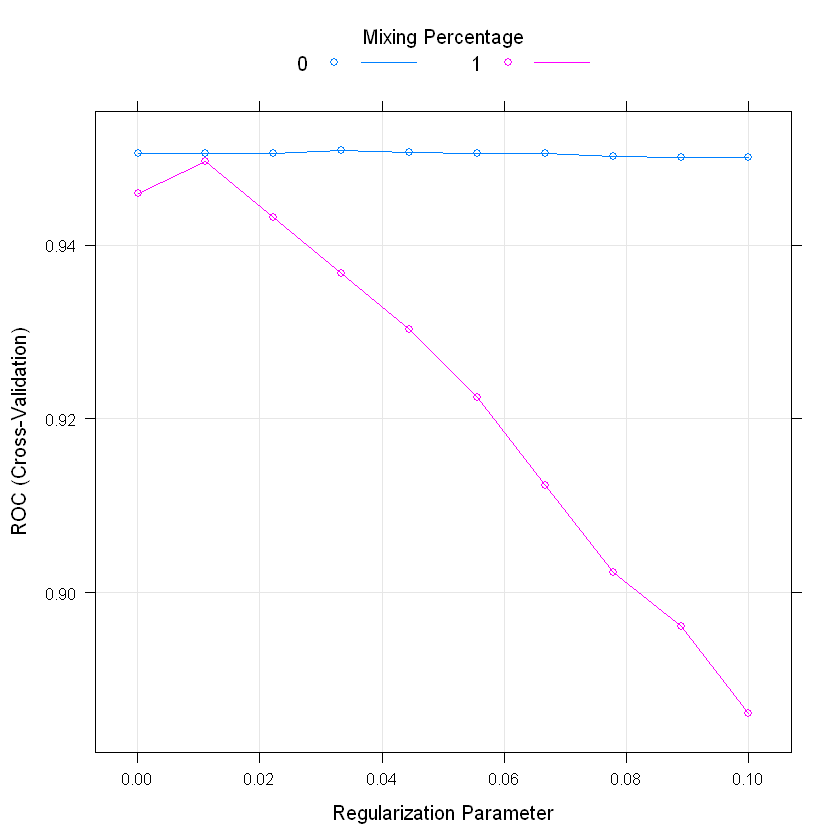

In [93]:
levels(knnhouse$target) = c("low", "high")
myControl <- trainControl(method = "cv", number = 10, summaryFunction = twoClassSummary,
classProbs = TRUE, verboseIter = TRUE)
myGrid2 = expand.grid(alpha = 0:1,lambda = seq(0.0001, 0.1, length = 10))


model4b <- train(target~.,data = knnhouse, method = "glmnet", 
               trControl = myControl, tuneGrid = myGrid2)
plot(model4b)
print(model4b)

ROC = 0.9508983, Alpha = 0, lambda = 0.0334
Most model had accuracy of about 0.88 or 0.87, this glmnet model produced signifcantly results

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0, lambda=0.05 
- Fold01: alpha=0, lambda=0.05 
+ Fold01: alpha=1, lambda=0.05 
- Fold01: alpha=1, lambda=0.05 
+ Fold02: alpha=0, lambda=0.05 
- Fold02: alpha=0, lambda=0.05 
+ Fold02: alpha=1, lambda=0.05 
- Fold02: alpha=1, lambda=0.05 
+ Fold03: alpha=0, lambda=0.05 
- Fold03: alpha=0, lambda=0.05 
+ Fold03: alpha=1, lambda=0.05 
- Fold03: alpha=1, lambda=0.05 
+ Fold04: alpha=0, lambda=0.05 
- Fold04: alpha=0, lambda=0.05 
+ Fold04: alpha=1, lambda=0.05 
- Fold04: alpha=1, lambda=0.05 
+ Fold05: alpha=0, lambda=0.05 
- Fold05: alpha=0, lambda=0.05 
+ Fold05: alpha=1, lambda=0.05 
- Fold05: alpha=1, lambda=0.05 
+ Fold06: alpha=0, lambda=0.05 
- Fold06: alpha=0, lambda=0.05 
+ Fold06: alpha=1, lambda=0.05 
- Fold06: alpha=1, lambda=0.05 
+ Fold07: alpha=0, lambda=0.05 
- Fold07: alpha=0, lambda=0.05 
+ Fold07: alpha=1, lambda=0.05 
- Fold07: alpha=1, lambda=0.05 
+ Fold08: alpha=0, lambda=0.05 
- Fold08: alpha=0, lambda=0.05 
+ Fold08: alpha=1, lambda=0.05 
- Fold08

glmnet 

1460 samples
  17 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1314, 1315, 1314, 1314, 1314, 1313, ... 
Resampling results across tuning parameters:

  alpha  lambda       ROC        Sens       Spec     
  0      0.000100000  0.9487291  0.8409412  0.9106140
  0      0.005644444  0.9487291  0.8409412  0.9106140
  0      0.011188889  0.9487291  0.8409412  0.9106140
  0      0.016733333  0.9487291  0.8409412  0.9106140
  0      0.022277778  0.9486672  0.8409412  0.9106140
  0      0.027822222  0.9493462  0.8409412  0.9085088
  0      0.033366667  0.9493641  0.8389804  0.9085088
  0      0.038911111  0.9493431  0.8350196  0.9095614
  0      0.044455556  0.9492599  0.8310588  0.9095614
  0      0.050000000  0.9495884  0.8310588  0.9095614
  1      0.000100000  0.9443441  0.8310980  0.9000987
  1      0.005644444  0.9493237  0.8310980  0.9106140
  1      0.011188889  0.9473257  0.8095294  0.9137610
  1     

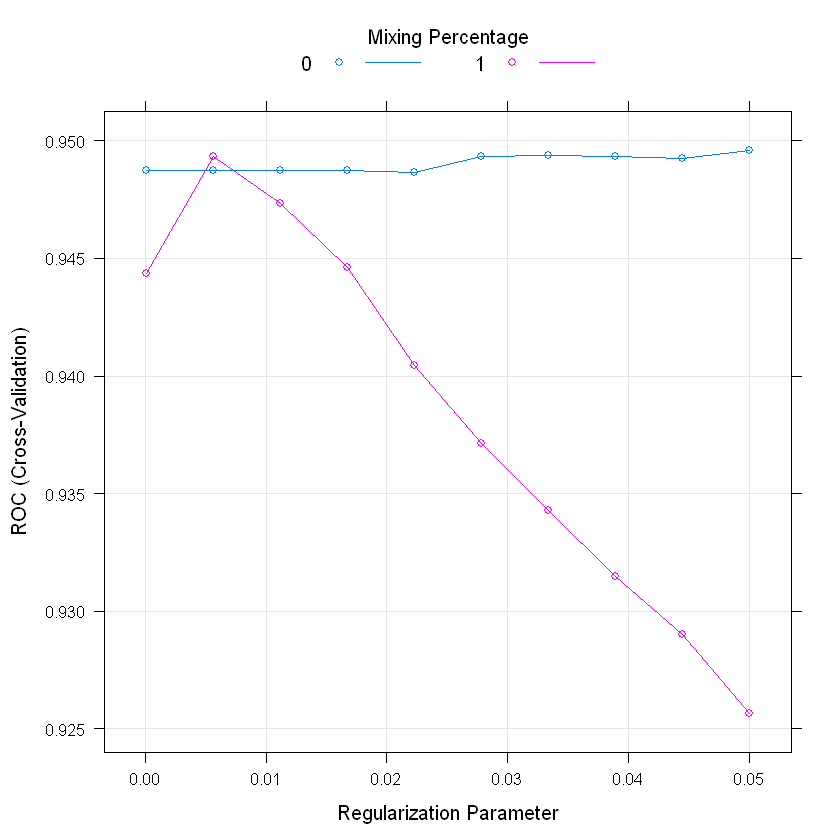

In [153]:
levels(knnhouse$target) = c("low", "high")
myControl <- trainControl(method = "cv", number = 10, summaryFunction = twoClassSummary,
classProbs = TRUE, verboseIter = TRUE)
myGrid3 = expand.grid(alpha = 0:1,lambda = seq(0.0001, 0.05, length = 10))


model4t <- train(target~.,data = knnhouse, method = "glmnet", 
               trControl = myControl, tuneGrid = myGrid3)
plot(model4t)
print(model4t)

ROC = 0.949917 Alpha = 0 lambda = .0056  Slightly worse than the less tuned glmnet model

In [95]:
model5b <- train(target~.,data = knnhouse, method = "rpart", 
               trControl = trainControl(method ="cv", number = 10, verboseIter = TRUE))
print(model5b)

+ Fold01: cp=0.05108 
- Fold01: cp=0.05108 
+ Fold02: cp=0.05108 
- Fold02: cp=0.05108 
+ Fold03: cp=0.05108 
- Fold03: cp=0.05108 
+ Fold04: cp=0.05108 
- Fold04: cp=0.05108 
+ Fold05: cp=0.05108 
- Fold05: cp=0.05108 
+ Fold06: cp=0.05108 
- Fold06: cp=0.05108 
+ Fold07: cp=0.05108 
- Fold07: cp=0.05108 
+ Fold08: cp=0.05108 
- Fold08: cp=0.05108 
+ Fold09: cp=0.05108 
- Fold09: cp=0.05108 
+ Fold10: cp=0.05108 
- Fold10: cp=0.05108 
Aggregating results
Selecting tuning parameters
Fitting cp = 0.0511 on full training set
CART 

1460 samples
  17 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1314, 1314, 1314, 1314, 1314, 1314, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.05108055  0.8226482  0.6038277
  0.10216110  0.7828986  0.4946409
  0.33988212  0.6931521  0.1827220

Accuracy was used to select the optimal model using the largest value.
The final value used for 

Best accuracy of 0.8226 with a cp of 0.05108

In [96]:
splitIndex <- createDataPartition(knnhouse$target, p = .70, list = FALSE, times = 1)
train1 <- knnhouse[ splitIndex,]
test1 <- knnhouse[-splitIndex,]
model6b = ranger(target ~., data = train1)
pred6b = predict(model6b,data = test1)$predictions
cm1 = confusionMatrix(pred6b, test1$target, positive = NULL)
cm1

Confusion Matrix and Statistics

          Reference
Prediction low high
      low  130   27
      high  22  258
                                          
               Accuracy : 0.8879          
                 95% CI : (0.8545, 0.9159)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7547          
 Mcnemar's Test P-Value : 0.5677          
                                          
            Sensitivity : 0.8553          
            Specificity : 0.9053          
         Pos Pred Value : 0.8280          
         Neg Pred Value : 0.9214          
             Prevalence : 0.3478          
         Detection Rate : 0.2975          
   Detection Prevalence : 0.3593          
      Balanced Accuracy : 0.8803          
                                          
       'Positive' Class : low             
                                          

Accuracy = 0.8879, Balanced Accuracy = 0.8803

### Conclusion 
Models have strong predicting power for home sales price.  The Knn impuation was the most succesful imputation method with a baseline accuracy of 0.88. The best model was the Knn glmnet model with a ROC of 0.95.  All other model still had strong predictive power with accuracies of 0.87,0.88.  Recoding and Encoding did not add any predictive power. The variables were already reduced to one with strong predictive power.This was evident in the differnces between the target variables as they were quite noticable in the graphics. Overall,  This dataset could be used to predict if the sales price of a home was above of below the projected median cost.